In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("",train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
x , y = data[0][0] ,data[1][0]
print(y)

tensor(2)


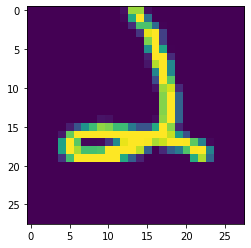

In [6]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

In [7]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [8]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0 }

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)]  +=1
        total +=1
        
print(counter_dict)        

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [9]:
for i in counter_dict:
    print(f"{i}:{counter_dict[i]/total*100}")
    

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [10]:
import torch.nn as nn 
import torch.nn.functional as F

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
        
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
X = torch.rand((28,28))
X = X.view(1,28*28)
output = net(X)


In [13]:
output

tensor([[-2.2313, -2.3019, -2.3626, -2.3821, -2.3248, -2.3636, -2.2765, -2.2608,
         -2.1866, -2.3547]], grad_fn=<LogSoftmaxBackward>)

In [14]:
import torch.optim as optim
 
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss) 
        

tensor(0.1441, grad_fn=<NllLossBackward>)
tensor(0.6007, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)


In [15]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.968


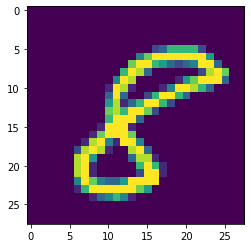

In [16]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [23]:
print(torch.argmax(net(X.view(-1,784))[0]))

tensor(8)


In [24]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)
output

tensor([-1.0562e+01, -1.2288e+01, -1.4524e+01, -1.4406e+01, -1.6325e+01,
        -9.5218e+00, -7.7459e+00, -1.5509e+01, -5.3856e-04, -1.4156e+01],
       grad_fn=<SelectBackward>)


tensor([[-1.0562e+01, -1.2288e+01, -1.4524e+01, -1.4406e+01, -1.6325e+01,
         -9.5218e+00, -7.7459e+00, -1.5509e+01, -5.3856e-04, -1.4156e+01]],
       grad_fn=<LogSoftmaxBackward>)

In [21]:
biggest_index = torch.argmax(output)
print(biggest_index)

tensor(8)
